## Importing Libraries 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Exploring

In [8]:
data= pd.read_excel(r"C:\Users\HP\Downloads\online_retail_II.xlsx", sheet_name=1)

In [9]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
data.shape

(536642, 8)

In [11]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [13]:
data.describe(include='O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [14]:
data.isna().sum()## checking missing values

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

##### so many customers with no id in our data whih means we must drop tem cuz we cant indicate those customers or get any useful analysis from them
##### description will not be used in our analysis since we will fous on customers segmentation analysis

In [17]:
data.duplicated().sum()## checking for duplicates 

np.int64(0)

In [16]:
data.drop_duplicates(inplace=True)

In [22]:
### checking if there are null customers 
data[data['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [23]:
### checking for negative quantities (canecellation or garbage )
data[data['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [24]:
## checking columns data types 
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [25]:
data['Invoice']=data['Invoice'].astype("str")

In [26]:
data[data['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [28]:
data["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [32]:
data[data["Invoice"].str.startswith("A")]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [33]:
data[data['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


#### Insight: A in the invoice column refers to Adujust bad dept )

In [34]:
data["StockCode"] = data["StockCode"].astype("str")

In [36]:
data[(data["StockCode"].str.match("^\\d{5}$") == False) & (data["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

##### Insight: Looks like there are diverse of stock ode we need to dive in to see if we will need them or drop them 

In [37]:
data[data['StockCode'].str.contains('^POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5095,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.0,12713.0,Germany


In [39]:
data[data['StockCode'].str.contains('^DCGS')].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,NaN,United Kingdom
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,NaN,United Kingdom


##### DCGS stocks looks valid but most of thier customers are nans (we must drop) 

In [41]:
data[data['StockCode'].str.contains('^CRUK')].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324003,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333745,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom


In [42]:
data[data['StockCode'].str.contains('^PADS')].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358670,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom


### After Analysing I came to this Observation

#### Stock Code
* `StockCode` is meant to follow the pattern `[0-9]{5}` but also contains legitimate values following `[0-9]{5}[a-zA-Z]+` (e.g., `85099A`, `22301B`).
* It also contains a range of **non-product or administrative codes** that should be handled carefully before clustering.

| **Code**             | **Description**                                                                 | **Action**                |
|----------------------|---------------------------------------------------------------------------------|---------------------------|
| **DCGS**             | Looks valid, represents Decorative Gift Sets; however, some quantities are negative (returns) and Customer IDs are null | **Exclude from clustering (only include positive transactions)** |
| **D**                | Represents discount or credit note entries                                      | **Exclude from clustering** |
| **DOT**              | Represents postage or delivery charges                                          | **Exclude from clustering** |
| **M** / **m**        | Represents manual transactions or adjustments                                   | **Exclude from clustering** |
| **C2**               | Carriage or delivery transaction (service charge)                               | **Exclude from clustering** |
| **C3**               | Rare code, appears only once                                                    | **Exclude** |
| **BANK CHARGES** / **B** | Represents bank or transaction fees                                        | **Exclude from clustering** |
| **S**                | Samples sent to customers, not actual purchases                                 | **Exclude from clustering** |
| **TESTXXX**          | Test or dummy data entries                                                      | **Exclude from clustering** |
| **gift__XXX**        | Purchases with gift cards; no direct customer purchase behavior                 | **Exclude** |
| **PADS**             | Internal packaging material (low price: 0.001–0.03); not a sellable product     | **Exclude from clustering** |
| **SP1002**           | Special request item; only a few transactions, inconsistent pricing             | **Exclude for now** |
| **AMAZONFEE**        | Platform or shipping-related fee from Amazon                                    | **Exclude for now** |
| **ADJUSTX**          | Manual administrative adjustment entries                                        | **Exclude for now** |


## Data Cleaning

In [46]:
clean_data=data.copy()

In [48]:
clean_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
clean_data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [56]:
clean_data.dropna(subset=['Customer ID'],inplace=True)

In [51]:
mask =(clean_data['Invoice'].str.match("^\\d{6}$")== True)

clean_data=clean_data[mask]

In [50]:
clean_data['Invoice']=clean_data['Invoice'].astype("str")

In [52]:
clean_data['StockCode']=clean_data['StockCode'].astype("str")

In [55]:
mask = (
    (clean_data["StockCode"].str.match("^\\d{5}$") == True)
    | (clean_data["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
)
clean_data=clean_data[mask]

In [58]:
clean_data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,391183.000000,391183,391183.000000,391183.000000
mean,13.179665,2011-07-10 19:37:28.017628416,2.874130,15295.083503
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:05:00,1.950000,15158.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,181.907403,NaN,4.284639,1710.359579


In [60]:
clean_data['InvoiceDate']=clean_data['InvoiceDate'].fillna(clean_data['InvoiceDate'].mean())

In [61]:
clean_data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [63]:
clean_data.duplicated().sum()

np.int64(0)

In [64]:
clean_data.shape

(391183, 8)

## EDA Feature Engineering

In [65]:
clean_data['Total_Sales']=clean_data['Price']*clean_data['Quantity']

In [66]:
clean_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [71]:
aggregated_data = clean_data.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("Total_Sales", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_data.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00


In [69]:
max_Invoice_date=aggregated_data['LastInvoiceDate'].max()

In [72]:
aggregated_data['Recency']=(max_Invoice_date-aggregated_data['LastInvoiceDate']).dt.days

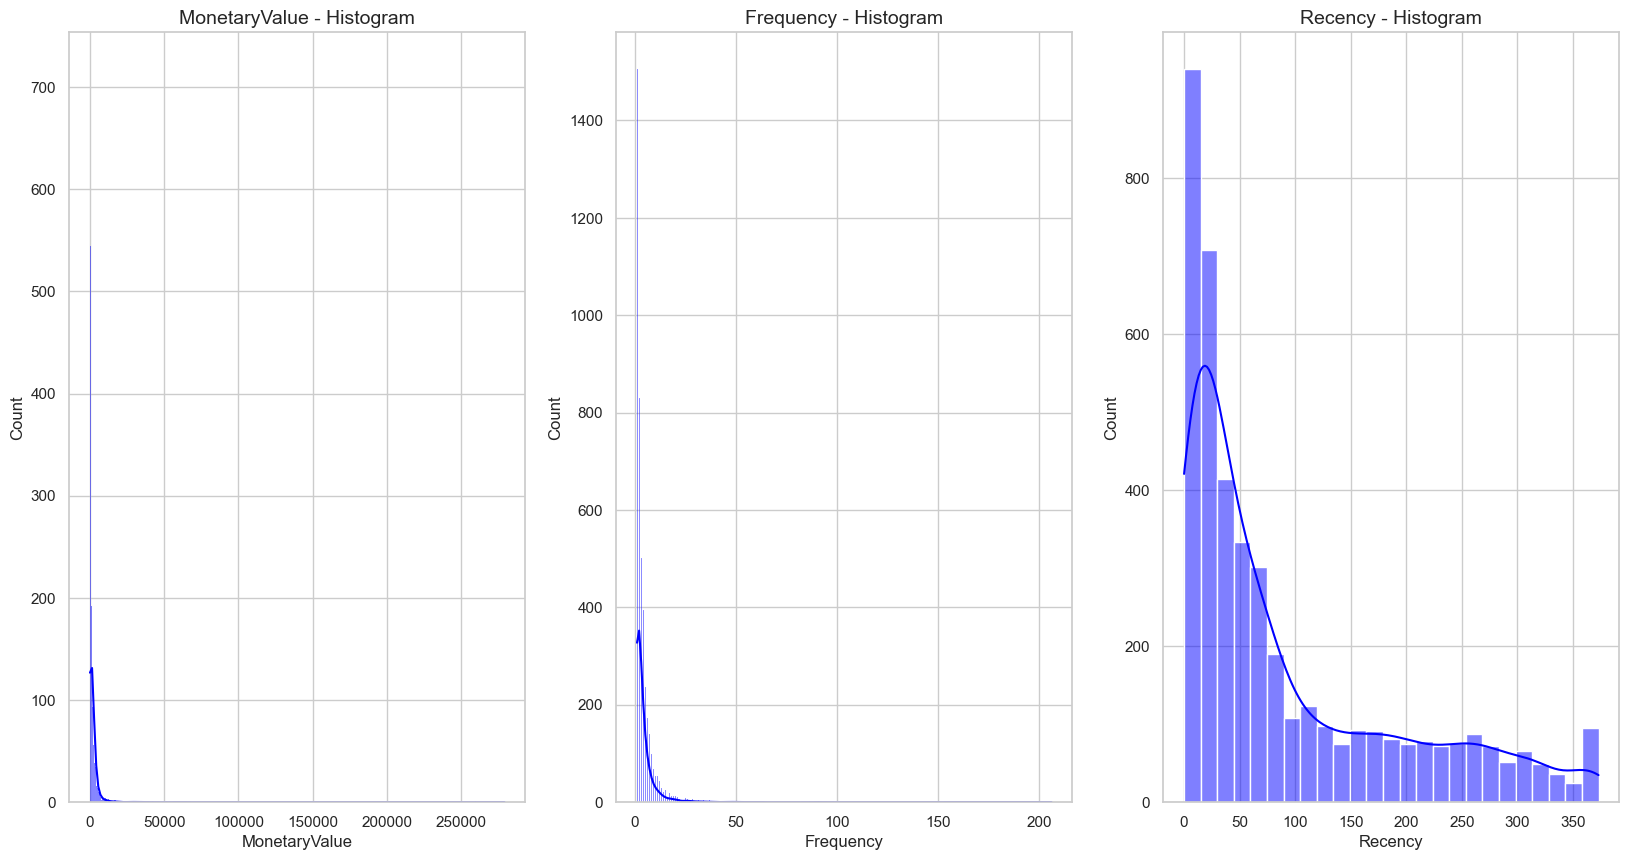

In [77]:
### Visualization Of Features 
features=["MonetaryValue","Frequency","Recency"]
sns.set(style="whitegrid")
fig,axes = plt.subplots(1, 3, figsize=(20, 10))
for i ,col in enumerate(features):
    ax = axes[i]
    sns.histplot(aggregated_data[col],kde=True,color='blue', ax=ax)
    ax.set_title(f"{col} - Histogram", fontsize=14)
    ax.set_ylabel("Count")
plt.show()

##### Most of the features are skewed (has lots of outliers )

### Visualize outliers 

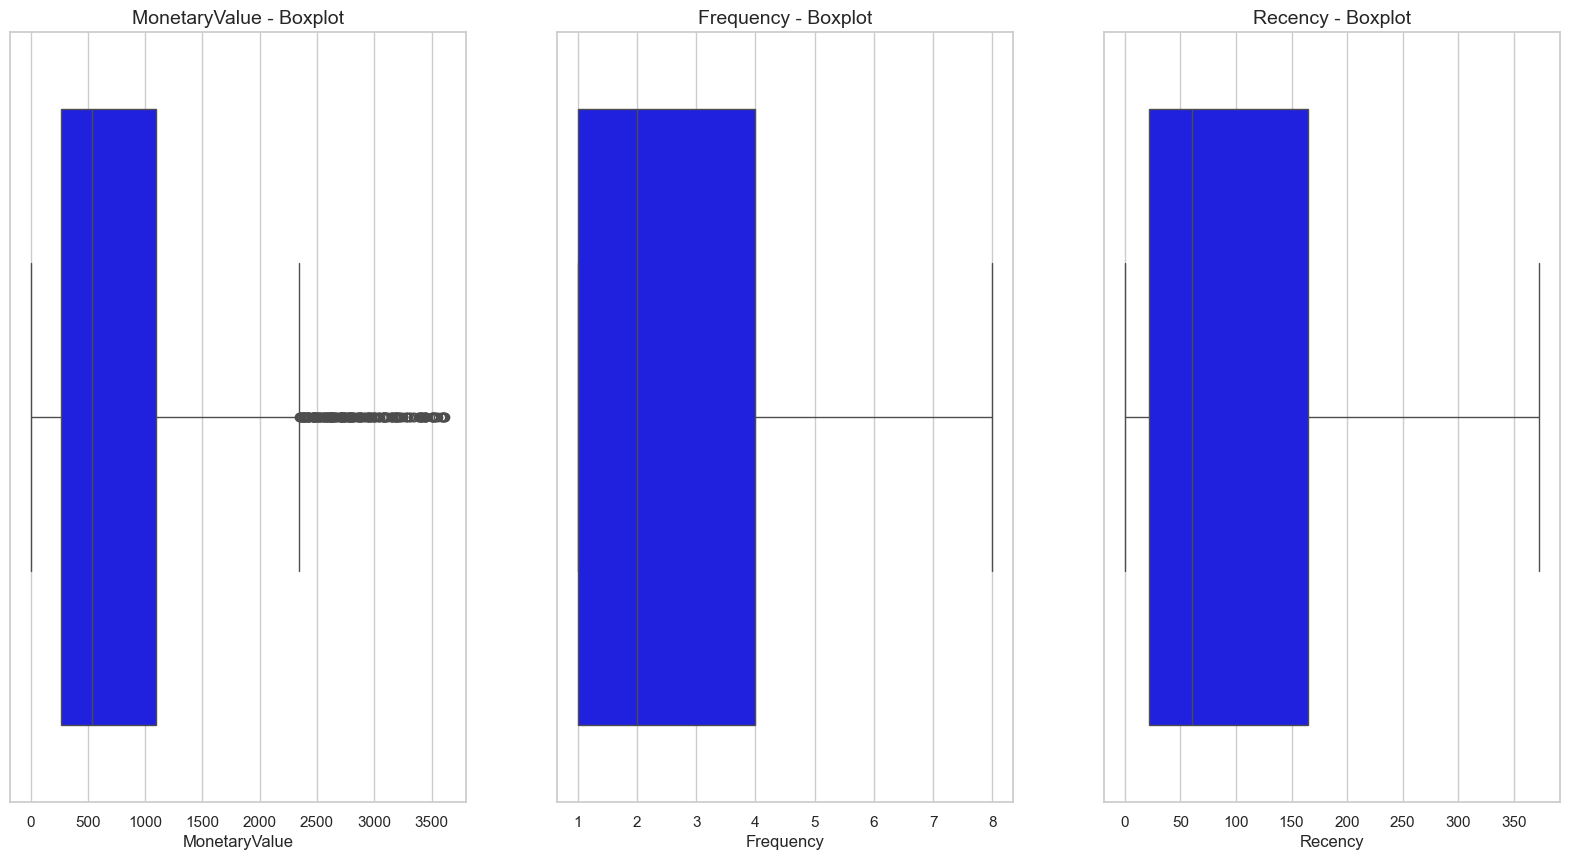

In [83]:
features=["MonetaryValue","Frequency","Recency"]
sns.set(style="whitegrid")
fig,axes = plt.subplots(1, 3, figsize=(20, 10))
for i ,col in enumerate(features):
    ax = axes[i]
    sns.boxplot(x=aggregated_data[col],color='blue', ax=ax)
    ax.set_title(f"{col} - Boxplot", fontsize=14)
    
plt.show()

#### Handling Outliers 

In [81]:
aggregated_data.columns


Index(['Customer ID', 'MonetaryValue', 'Frequency', 'LastInvoiceDate',
       'Recency'],
      dtype='object')

In [82]:
# Columns to clean
cols = ['MonetaryValue', 'Frequency', 'Recency']

# Loop over each column and filter using IQR
for col in cols:
    Q1 = aggregated_data[col].quantile(0.25)
    Q3 = aggregated_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    aggregated_data = aggregated_data[
        (aggregated_data[col] >= lower_bound) &
        (aggregated_data[col] <= upper_bound)
    ]


### Data Scaling

In [85]:
scalar=StandardScaler()
scaled_data=scalar.fit_transform(aggregated_data[['MonetaryValue', 'Frequency', 'Recency']])

In [86]:
scaled_data_df=pd.DataFrame(scaled_data,index=aggregated_data.index,columns=('MonetaryValue', 'Frequency', 'Recency'))

In [88]:
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
2,0.845756,0.805398,-0.274813
3,0.872879,-0.851483,-0.821867
4,-0.680450,-0.851483,2.020858
5,0.776980,2.462279,-0.655797
6,-0.954752,-0.851483,0.985364


In [89]:
scaled_data_df.shape

(3751, 3)

### Plotting the features in 3d space

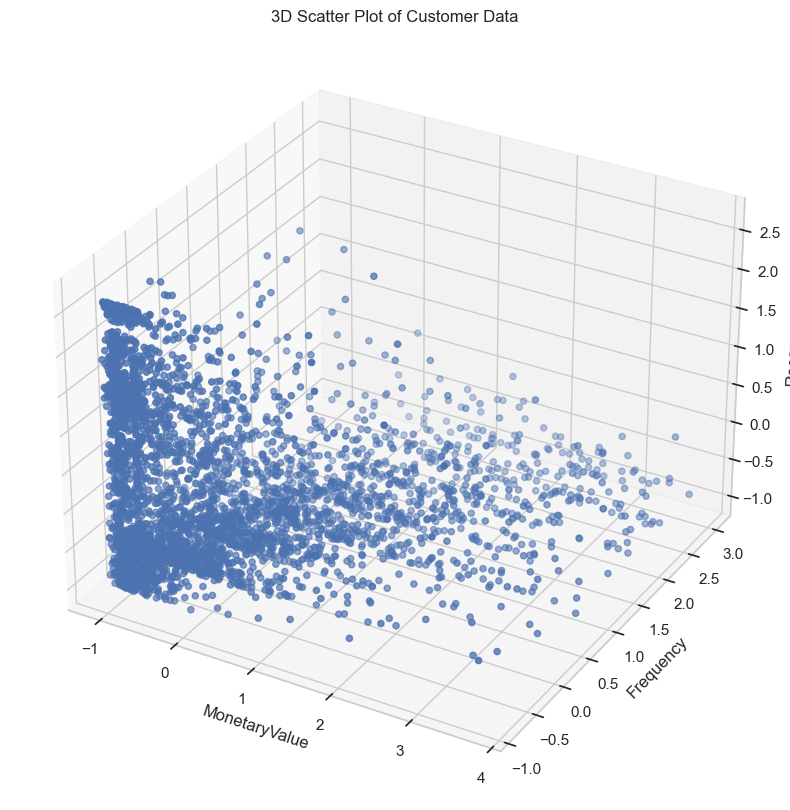

In [95]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(projection ="3d")
scatter=ax.scatter(scaled_data_df['MonetaryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")
plt.show()


#####  In the 3d projection Data appears to be overlapped 

## Kmeans Clustering (choosing the optimal k using elbow method)

In [109]:
max_k=10
inertia=[]
silhouette_scores=[]
k_values=range(2,max_k + 1)

In [110]:
for k in k_values:
    kmeans=KMeans(n_clusters=k,max_iter=1000,random_state=42)
    clusters_label=kmeans.fit_predict(scaled_data_df)
    sil_score=silhouette_score(scaled_data_df,clusters_label)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    
    
    
    

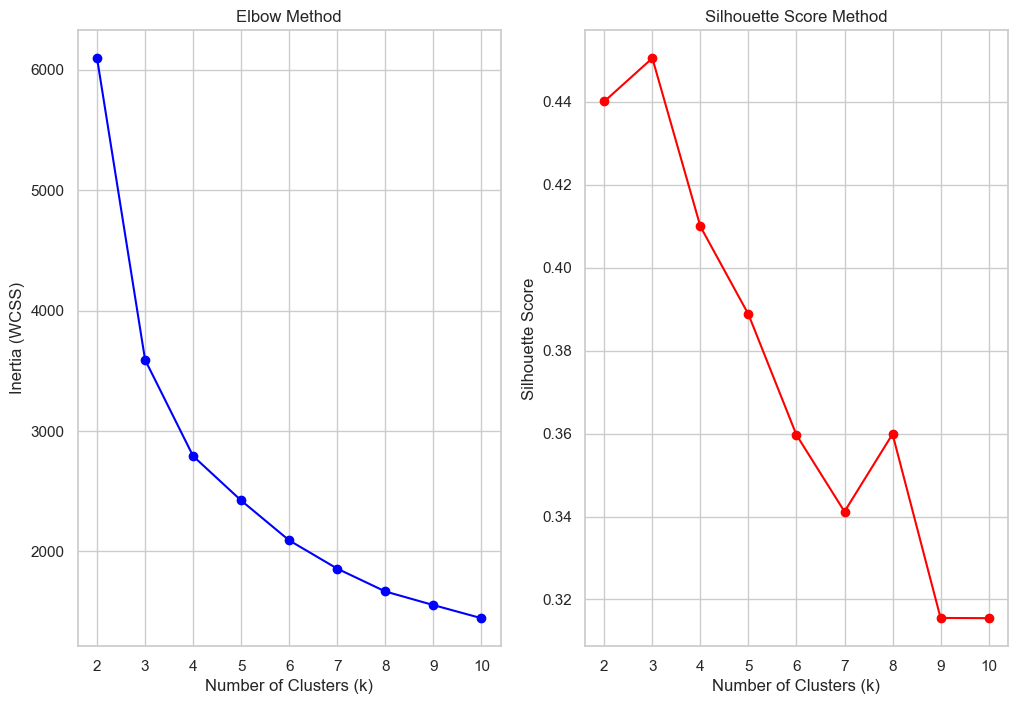

In [112]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o',color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, 'o-', color='red')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()

### Insight:
#### Based on the Elbow and Silhouette analysis, k = 4 was identified as the optimal number of clusters.
#### The Elbow Method shows a noticeable reduction in inertia up to 4 clusters, after which the marginal improvement decreases.

In [113]:
kmeans=KMeans(n_clusters=4,max_iter=1000,random_state=42)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

array([3, 0, 1, ..., 1, 0, 3], dtype=int32)

In [114]:
scaled_data_df['clusters']=cluster_labels

In [117]:
scaled_data_df.head(1)

,MonetaryValue,Frequency,Recency,clusters
2,0.845756,0.805398,-0.274813,3


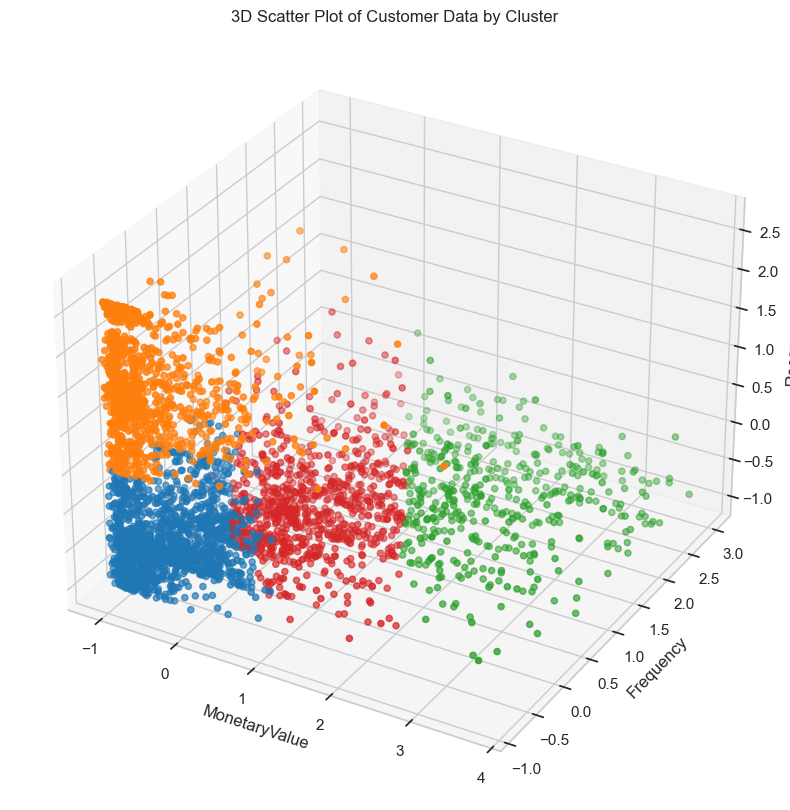

In [120]:
cluster_colors = {0: '#1f77b4',  
                  1: '#ff7f0e',  
                  2: '#2ca02c',  
                  3: '#d62728'}  
colors=scaled_data_df['clusters'].map(cluster_colors)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(scaled_data_df['MonetaryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'],c=colors,marker='o')
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title('3D Scatter Plot of Customer Data by Cluster')
plt.show()

#### insight:
##### there are lots of overlapping with each cluster especially cluster 0 and 3

### plotting each cluster with each feature 

In [121]:
scaled_data_df.columns

Index(['MonetaryValue', 'Frequency', 'Recency', 'clusters'], dtype='object')

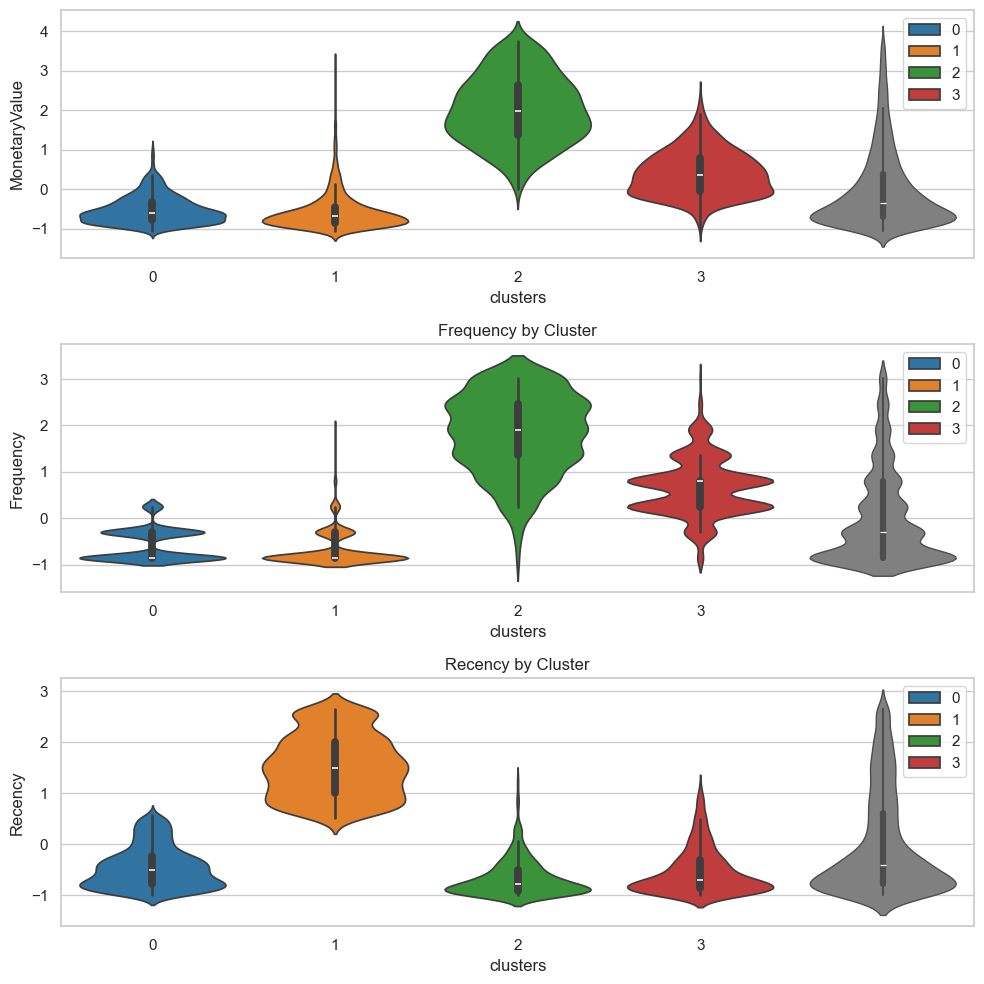

In [128]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.violinplot(x=scaled_data_df['clusters'],y=scaled_data_df['MonetaryValue'], palette=cluster_colors, hue=scaled_data_df["clusters"])
sns.violinplot(y=scaled_data_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.subplot(3, 1, 2)
sns.violinplot(x=scaled_data_df['clusters'], y=scaled_data_df['Frequency'], palette=cluster_colors, hue=scaled_data_df["clusters"])
sns.violinplot(y=scaled_data_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=scaled_data_df['clusters'], y=scaled_data_df['Recency'], palette=cluster_colors, hue=scaled_data_df["clusters"])
sns.violinplot(y=scaled_data_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

| **Cluster (Color)**       | **Recency**                              | **Frequency** | **Monetary Value** | **Customer Segment**             | **Insight / Recommended Action**                                                                                                                             |
| -------------------------- | ---------------------------------------- | -------------- | ------------------ | -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| 🟥 **Cluster 3 (Red)**     | Medium–Low                               | Medium         | **Good (High)**    | **Active Loyal Buyers**          | These customers purchase relatively frequently and generate strong revenue. They’re valuable and should be engaged with loyalty rewards or exclusive offers. |
| 🟦 **Cluster 0 (Blue)**    | **High**                                 | **Low**        | **Low**            | **Lost / Inactive Customers**    | Have not purchased recently and show low engagement and spending. Consider reactivation campaigns, discounts, or surveys to understand churn.                |
| 🟩 **Cluster 2 (Green)**   | **Low (recent purchases)**               | **High**       | **High**           | **Best / High-Value Customers**  | These are your **top-tier, loyal, and high-spending customers**. Prioritize them for retention, personalized experiences, and premium benefits.              |
| 🟨 **Cluster 1 (Yellow)**  | **High (long time since last purchase)** | **Low**        | **Low**            | **At-Risk or Dormant Customers** | Show low spending and infrequent purchases. Reactivation or re-engagement campaigns can help bring them back.                                                |


### The analysis reveals that most business value is driven by the Green (Cluster 2) and Red (Cluster 3) segments.
##### These customers have strong purchasing behavior and should be retained and nurtured.
##### In contrast, Blue (Cluster 0) and Yellow (Cluster 1) represent inactive or low-engagement customers, 
##### suitable for targeted reactivation campaigns or cost-optimized marketing efforts.

## visuaization

In [138]:
cluster_names = {
    0: "Inactive Customers",
    1: "Dormant Customers",
    2: " VIP Customers",
    3: "Loyal Regular Customers"
}

scaled_data_df["Cluster_Name"] = scaled_data_df["clusters"].map(cluster_names)


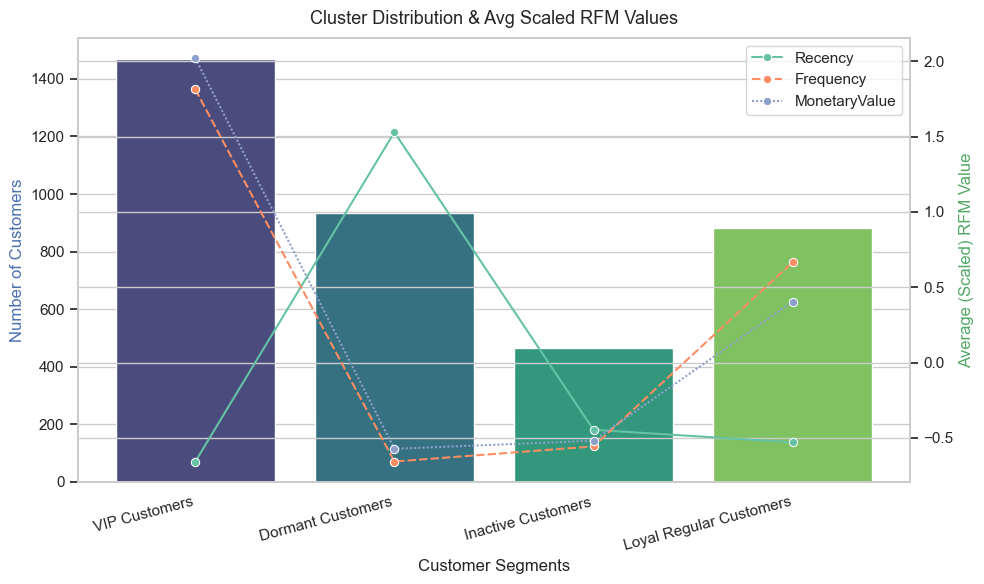

In [140]:
# Cluster counts and RFM means
cluster_counts = scaled_data_df['clusters'].value_counts().sort_index()
rfm_means = scaled_data_df.groupby('Cluster_Name')[['Recency'*, 'Frequency', 'MonetaryValue']].mean()
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=rfm_means.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution & Avg Scaled RFM Values', fontsize=13, pad=10)
ax1.set_xlabel('Customer Segments')
ax2 = ax1.twinx()
sns.lineplot(data=rfm_means, ax=ax2, marker='o', palette='Set2')
ax2.set_ylabel('Average (Scaled) RFM Value', color='g')
ax1.set_xticklabels(rfm_means.index, rotation=15, ha='right')

plt.tight_layout()
plt.show()

### 💎 Final RFM Cluster Summary with Recommended Actions

| **Customer Segment**        | **Recency**                 | **Frequency** | **MonetaryValue** | **Interpretation / Segment Type**                                                              | **Next Action**                                                                                       |
|-----------------------------|-----------------------------|----------------|--------------------|------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Inactive Customers**      | 🔼 High (recently inactive) | 🔽 Low         | 🔽 Low             | **Lost / Dormant Customers** — haven’t bought recently, rarely buy, and spend little.          | Run **reactivation campaigns** (email/SMS), offer discounts or surveys to understand churn.         |
| **Dormant Customers**       | 🔽 Medium–low recency       | 🔽 Low         | 🔽 Low             | **At-Risk Customers** — somewhat recent but low purchase frequency and low spend.              | Send **targeted offers or reminders**, highlight new arrivals, and nudge them to return.           |
| **VIP Customers**           | 🔽 Very low recency         | 🔼 High        | 🔼 High            | **Champions / VIPs** — buy frequently, recently, and spend the most; your top-value customers. |  **Reward loyalty** with exclusive perks, early access, or personalized experiences to retain them.  |
| **Loyal Regular Customers** | 🔽 Medium recency           | 🔼 Medium      | 🔼 Medium-high     | **Loyal Regulars** — consistent buyers who are valuable and stable, but not the top tier.      |  Keep them engaged with **loyalty points**, cross-sell recommendations, and appreciation messages.  |
